In [30]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import visuals as vs
from sklearn import tree
import graphviz
from matplotlib.ticker import MaxNLocator

In [31]:
data = pd.read_csv('4train.csv')
data.head()


,StimeSec,isrushhour,isnight,SLONCOL,SLATCOL,ELONCOL,ELATCOL,dtdis,distance,interval
0,64,0,1,74,29,68,21,10.000000,6785.602632,1014
1,1096,0,1,68,21,62,41,20.880613,15698.063306,1591
2,10024,0,1,70,24,62,35,13.601471,15144.760499,5213
3,24080,0,0,65,16,64,16,1.000000,3797.074876,822
4,24912,0,0,64,16,67,25,9.486833,7497.547127,916


In [32]:
data.isnull().sum()


StimeSec      0
isrushhour    0
isnight       0
SLONCOL       0
SLATCOL       0
ELONCOL       0
ELATCOL       0
dtdis         0
distance      0
interval      0
dtype: int64

In [33]:
data.describe()

,StimeSec,isrushhour,isnight,SLONCOL,SLATCOL,ELONCOL,ELATCOL,dtdis,distance,interval
count,8803.000000,8803.000000,8803.000000,8803.000000,8803.000000,8803.000000,8803.000000,8803.000000,8803.000000,8803.000000
mean,50928.897535,0.177667,0.149608,60.594343,27.713507,60.613200,27.880836,12.015148,9450.945618,1487.865500
std,22854.527264,0.382254,0.356707,18.489243,12.024550,18.574591,12.081654,11.074701,8488.662946,1060.780035
min,0.000000,0.000000,0.000000,6.000000,3.000000,6.000000,5.000000,0.000000,563.040067,129.000000
25%,35281.500000,0.000000,0.000000,52.000000,20.000000,52.000000,20.000000,4.472136,3923.329467,759.000000
50%,52904.000000,0.000000,0.000000,62.000000,23.000000,62.000000,23.000000,8.544004,6798.369150,1172.000000
75%,70961.500000,0.000000,0.000000,74.000000,35.000000,74.000000,35.000000,15.524175,12044.937324,1866.000000
max,85863.000000,1.000000,1.000000,154.000000,82.000000,154.000000,82.000000,105.536723,89334.727462,7064.000000


In [34]:
data['lginterval'] = np.log10(data['interval'])

<Axes: >

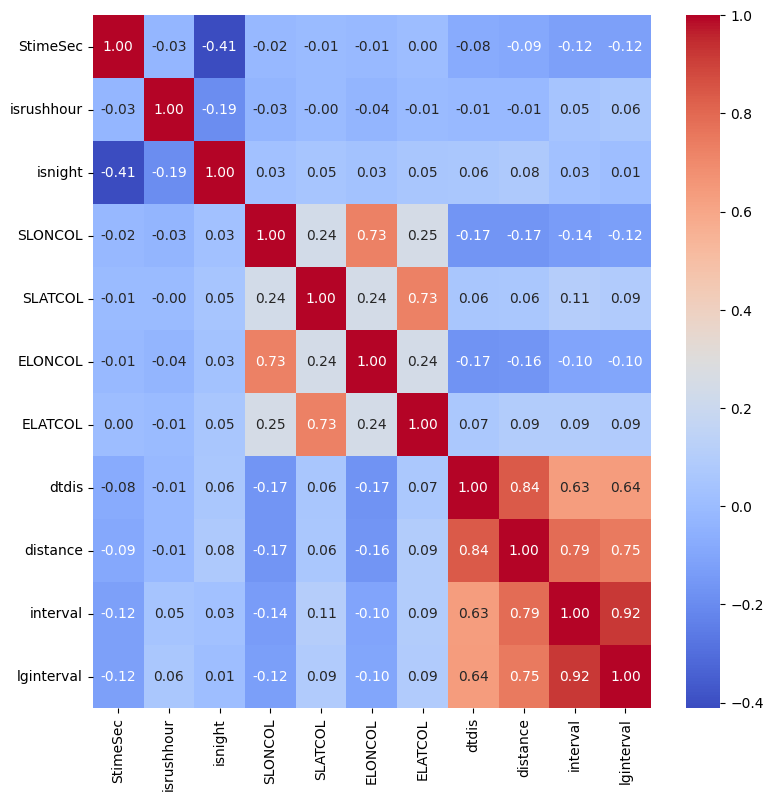

In [35]:
corr = data.corr()
corr.shape
plt.figure(figsize = (9,9))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='coolwarm')

e:\Python\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

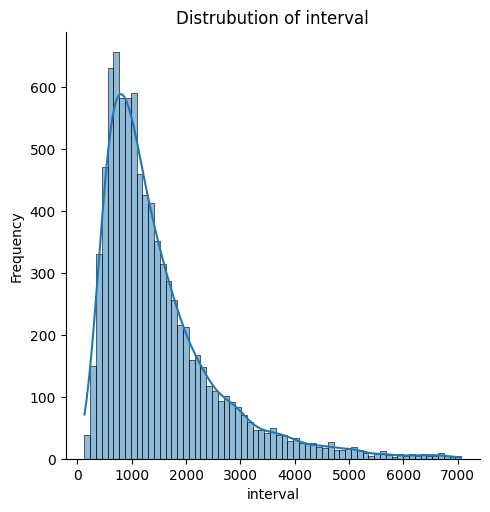

In [7]:
plt.figure(figsize=(8,6))
sns.displot(data['interval'],kde=True)
plt.title('Distrubution of interval')
plt.xlabel('interval')
plt.ylabel('Frequency')
plt.show()

e:\Python\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

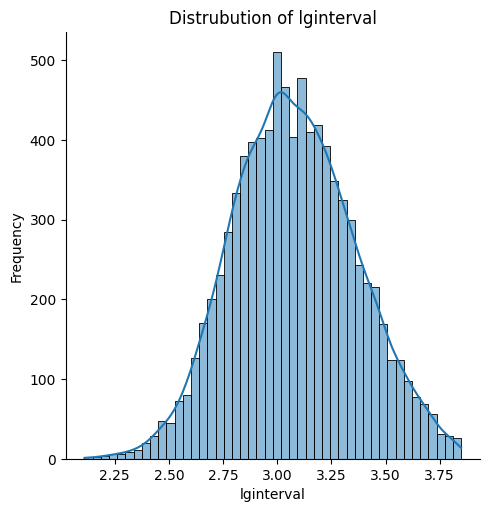

In [8]:
plt.figure(figsize=(8,6))
sns.displot(data['lginterval'],kde=True)
plt.title('Distrubution of lginterval')
plt.xlabel('lginterval')
plt.ylabel('Frequency')
plt.show()

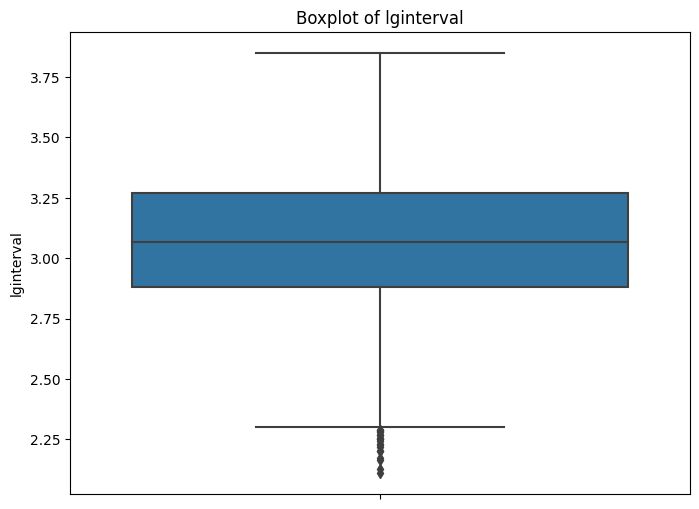

In [9]:
plt.figure(figsize=(8,6))
sns.boxplot(y=data['lginterval'])
plt.title('Boxplot of lginterval')
plt.ylabel('lginterval')
plt.show()

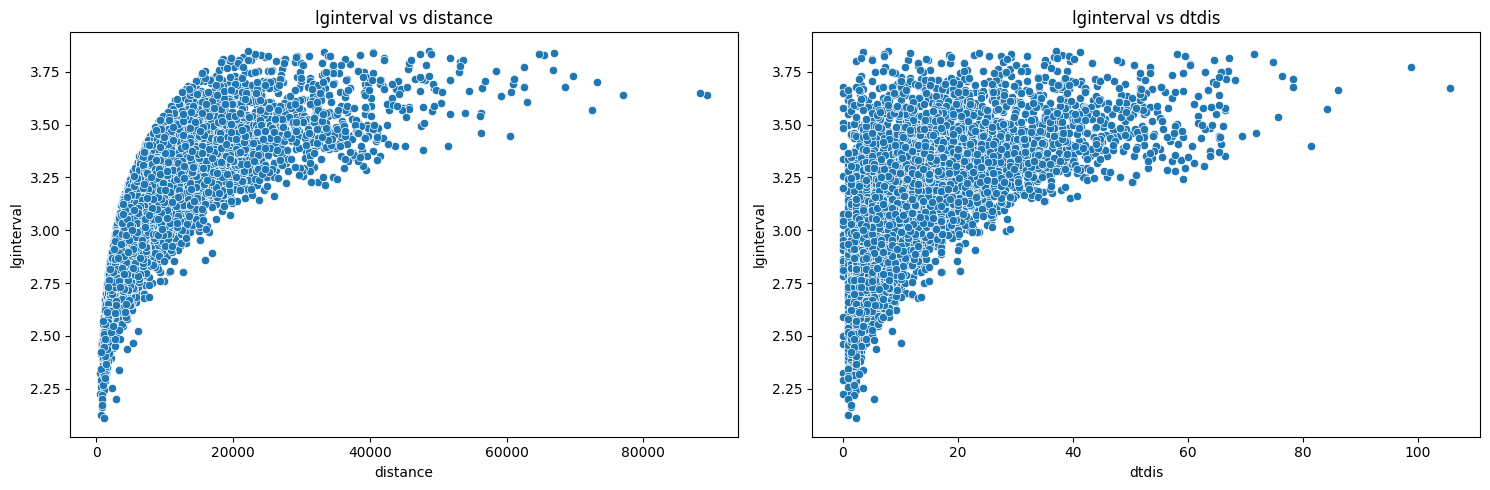

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x=data['distance'],y=data['lginterval'])
plt.title('lginterval vs distance')
plt.subplot(1,2,2)
sns.scatterplot(x=data['dtdis'],y=data['lginterval'])
plt.title('lginterval vs dtdis')
plt.tight_layout()
plt.show()


<Axes: xlabel='rushhour', ylabel='interval'>

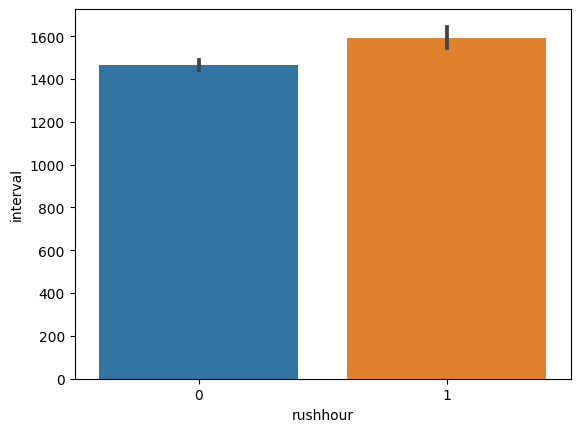

In [11]:
sns.barplot(data=data,x='rushhour',y='interval')

In [36]:
data

,StimeSec,isrushhour,isnight,SLONCOL,SLATCOL,ELONCOL,ELATCOL,dtdis,distance,interval,lginterval
0,64,0,1,74,29,68,21,10.000000,6785.602632,1014,3.006038
1,1096,0,1,68,21,62,41,20.880613,15698.063306,1591,3.201670
2,10024,0,1,70,24,62,35,13.601471,15144.760499,5213,3.717088
3,24080,0,0,65,16,64,16,1.000000,3797.074876,822,2.914872
4,24912,0,0,64,16,67,25,9.486833,7497.547127,916,2.961895
...,...,...,...,...,...,...,...,...,...,...,...
8798,82081,0,0,74,23,75,24,1.414214,788.703128,149,2.173186
8799,82240,0,0,75,24,75,22,2.000000,6344.016208,743,2.870989
8800,82992,0,1,75,22,78,38,16.278821,9548.684789,1012,3.005181
8801,84009,0,1,78,38,69,20,20.124612,11047.753534,1366,3.135451


In [38]:
from sklearn.model_selection import train_test_split

prices=data['lginterval']
features=data[['isrushhour','SLONCOL','SLATCOL','ELONCOL','ELATCOL','dtdis','distance']]
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

# Success
print("Training and testing split was successful.")

      isrushhour  SLONCOL  SLATCOL  ELONCOL  ELATCOL      dtdis      distance
4348           1       77       41       81       36   6.403124  10252.420276
4196           0       57       48       66       46   9.219544   5266.711595
6475           0       31       25       59       24  28.017851  17276.335182
6761           1       62       26       73       21  12.083046  10177.178766
1643           0       52       20       31       15  21.587033  11226.590900
...          ...      ...      ...      ...      ...        ...           ...
5734           0       35       14       36        9   5.099020   4194.700358
5191           0       43       31       36       53  23.086793  14787.670996
5390           0       70       21       75       29   9.433981   6191.959201
860            1       98       61      104       63   6.324555   4729.483831
7270           0       37       16       63       22  26.683328  13945.653278

[7042 rows x 7 columns]
      isrushhour  SLONCOL  SLATCOL  ELO

In [39]:
from sklearn.metrics import r2_score
dtr=tree.DecisionTreeRegressor()
dtr.fit(X_train,y_train)
regressor_predictions = dtr.predict(X_test)
score=r2_score(y_test,regressor_predictions)
print(f"r2_score for Decision Tree Classification: {score}")

r2_score for Decision Tree Classification: 0.5341495147012635


In [40]:
dtr.tree_.max_depth

35

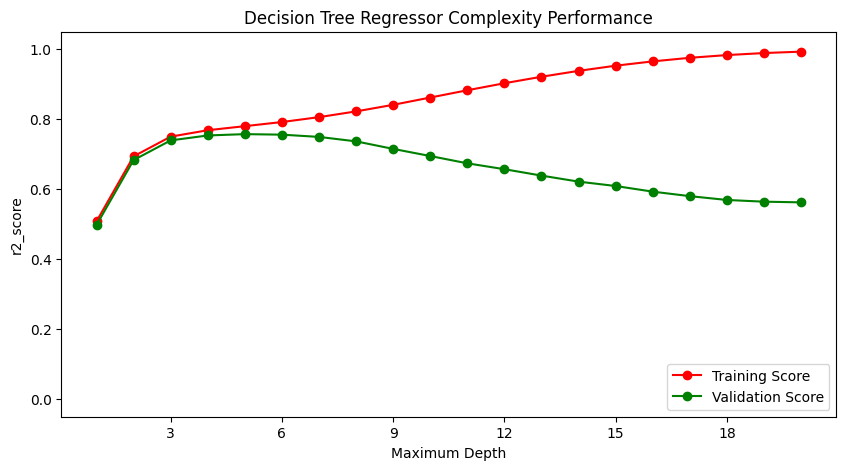

In [41]:
vs.ModelComplexity(X_train, y_train)

In [42]:
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.metrics import make_scorer
from sklearn import tree
from sklearn import metrics

def fit_model(X, y):
    """ 基于输入数据 [X,y]，利于网格搜索找到最优的决策树模型"""
    
    cross_validator = KFold()
    
    regressor = tree.DecisionTreeRegressor()

    params = {'max_depth':range(1,9)}
    
    scoring_fnc = make_scorer(metrics.r2_score)

    grid = GridSearchCV(regressor,params,scoring=scoring_fnc,cv=cross_validator) #,cross_validator
    
    # 基于输入数据 [X,y]，进行网格搜索
    grid = grid.fit(X, y)
    # 查看参数
    #print(pd.DataFrame(grid.cv_results_))
    # 返回网格搜索后的最优模型
    return grid.best_estimator_
reg = fit_model(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [44]:
import joblib

N_CORES = joblib.cpu_count(only_physical_cores=True)
print(f"Number of physical cores: {N_CORES}")

Number of physical cores: 8


In [45]:

from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

models = {
    "Random Forest": RandomForestRegressor(
        min_samples_leaf=5, random_state=0, n_jobs=N_CORES
    ),
    "Hist Gradient Boosting": HistGradientBoostingRegressor(
        max_leaf_nodes=15, random_state=0, early_stopping=False
    ),
}
param_grids = {
    "Random Forest": {"n_estimators": [10, 20, 50, 100]},
    "Hist Gradient Boosting": {"max_iter": [10, 20, 50, 100, 300, 500]},
}
cv = KFold(n_splits=4, shuffle=True, random_state=0)

results = []
for name, model in models.items():
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        return_train_score=True,
        cv=cv,
    ).fit(X_train, y_train)
    result = {"model": name, "cv_results": pd.DataFrame(grid_search.cv_results_)}
    results.append(result)

In [46]:
hgbm = grid_search.best_estimator_

In [55]:
hgbm.predict(np.array([[0,69,20,76,21,7.071068,4090.164175]]))

e:\Python\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names



array([2.93276065])

In [52]:
np.power(10,2.93276065)

856.5656414593706

In [53]:
import plotly.colors as colors
import plotly.express as px
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=1,
    cols=2,
    shared_yaxes=True,
    subplot_titles=["Train time vs score", "Predict time vs score"],
)
model_names = [result["model"] for result in results]
colors_list = colors.qualitative.Plotly * (
    len(model_names) // len(colors.qualitative.Plotly) + 1
)

for idx, result in enumerate(results):
    cv_results = result["cv_results"].round(3)
    model_name = result["model"]
    param_name = list(param_grids[model_name].keys())[0]
    cv_results[param_name] = cv_results["param_" + param_name]
    cv_results["model"] = model_name

    scatter_fig = px.scatter(
        cv_results,
        x="mean_fit_time",
        y="mean_test_score",
        error_x="std_fit_time",
        error_y="std_test_score",
        hover_data=param_name,
        color="model",
    )
    line_fig = px.line(
        cv_results,
        x="mean_fit_time",
        y="mean_test_score",
    )

    scatter_trace = scatter_fig["data"][0]
    line_trace = line_fig["data"][0]
    scatter_trace.update(marker=dict(color=colors_list[idx]))
    line_trace.update(line=dict(color=colors_list[idx]))
    fig.add_trace(scatter_trace, row=1, col=1)
    fig.add_trace(line_trace, row=1, col=1)

    scatter_fig = px.scatter(
        cv_results,
        x="mean_score_time",
        y="mean_test_score",
        error_x="std_score_time",
        error_y="std_test_score",
        hover_data=param_name,
    )
    line_fig = px.line(
        cv_results,
        x="mean_score_time",
        y="mean_test_score",
    )

    scatter_trace = scatter_fig["data"][0]
    line_trace = line_fig["data"][0]
    scatter_trace.update(marker=dict(color=colors_list[idx]))
    line_trace.update(line=dict(color=colors_list[idx]))
    fig.add_trace(scatter_trace, row=1, col=2)
    fig.add_trace(line_trace, row=1, col=2)

fig.update_layout(
    xaxis=dict(title="Train time (s) - lower is better"),
    yaxis=dict(title="Test R2 score - higher is better"),
    xaxis2=dict(title="Predict time (s) - lower is better"),
    legend=dict(x=0.72, y=0.05, traceorder="normal", borderwidth=1),
    title=dict(x=0.5, text="Speed-score trade-off of tree-based ensembles"),
)

In [56]:
joblib.dump(reg, filename='DTReg.pkl')
joblib.dump(hgbm,filename='HGBReg.pkl')

['HGBReg.pkl']